¡Dataset sintético creado con éxito!
   ID_Empleado Departamento  Antiguedad_Meses  Edad_Anios  \
0            1      Soporte                20          38   
1            2         RRHH                59          31   
2            3  Operaciones               112          38   
3            4      Soporte                65          41   
4            5   Ingeniería               106          45   

   P1_Satisfaccion_General  P2_Motivacion_Compromiso  P3_Orgullo_Empresa  \
0                        4                         4                   4   
1                        2                         3                   2   
2                        5                         3                   5   
3                        3                         4                   2   
4                        4                         3                   3   

   P4_Apoyo_Supervisor  P5_Valoracion_Ideas  P6_Feedback_Constructivo  \
0                    4                    4                       

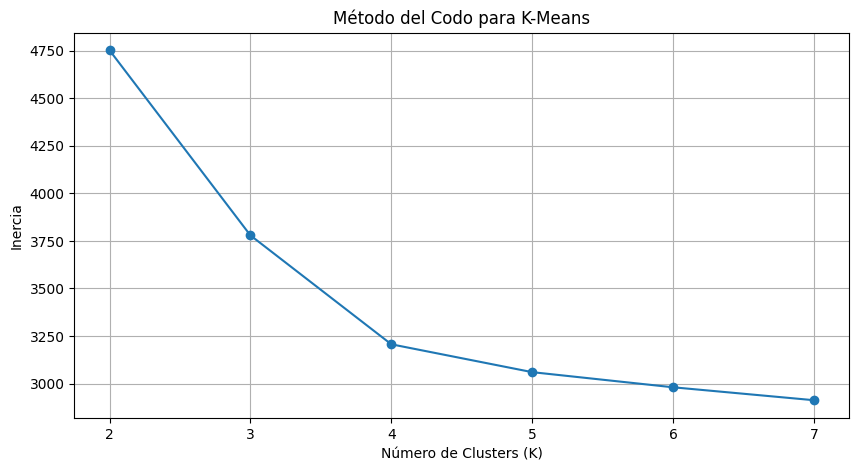

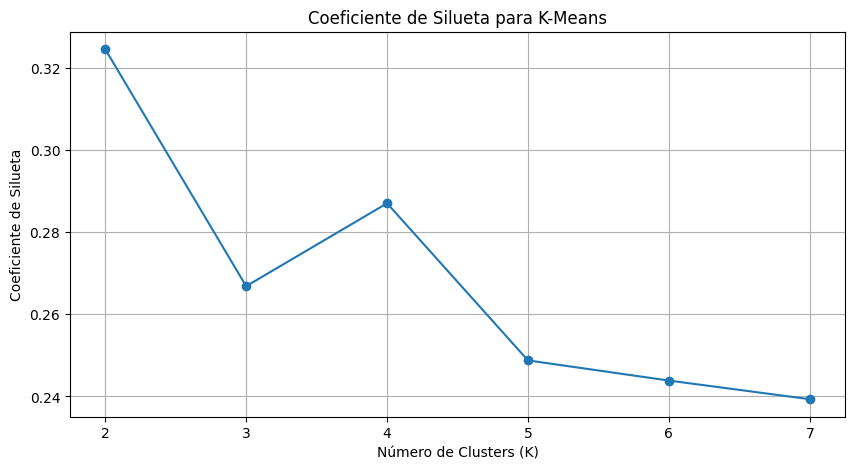


Entrenando K-Means con K óptimo = 4...

Asignación de Clusters completada. Primeras filas con el cluster asignado:
   ID_Empleado Departamento  Antiguedad_Meses  Edad_Anios  \
0            1      Soporte                20          38   
1            2         RRHH                59          31   
2            3  Operaciones               112          38   
3            4      Soporte                65          41   
4            5   Ingeniería               106          45   

   P1_Satisfaccion_General  P2_Motivacion_Compromiso  P3_Orgullo_Empresa  \
0                        4                         4                   4   
1                        2                         3                   2   
2                        5                         3                   5   
3                        3                         4                   2   
4                        4                         3                   3   

   P4_Apoyo_Supervisor  P5_Valoracion_Ideas  P6_Feedback_Con

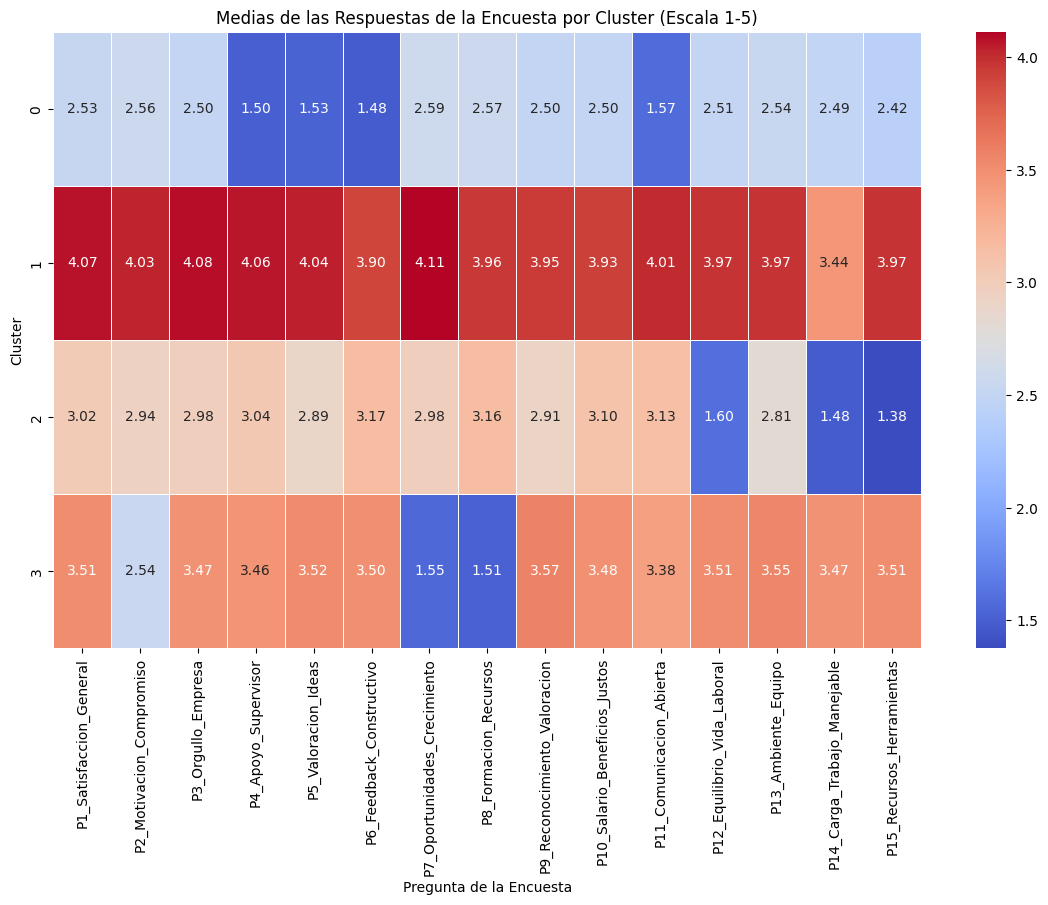


--- Características Demográficas por Cluster ---

Distribución de Departamento por Cluster:
Departamento  Finanzas  Ingeniería  Marketing  Operaciones  RRHH  Soporte  \
cluster                                                                     
0                 0.17        0.18       0.13         0.06  0.20     0.09   
1                 0.15        0.14       0.11         0.11  0.19     0.14   
2                 0.10        0.12       0.10         0.18  0.10     0.19   
3                 0.14        0.12       0.18         0.12  0.14     0.16   

Departamento  Ventas  
cluster               
0               0.16  
1               0.15  
2               0.21  
3               0.14  

Antigüedad Promedio (Meses) por Cluster:
cluster
0    62.56
1    64.87
2    66.74
3    56.54
Name: Antiguedad_Meses, dtype: float64

Edad Promedio (Años) por Cluster:
cluster
0    40.94
1    41.44
2    39.30
3    40.89
Name: Edad_Anios, dtype: float64

--- Interpretación y Posibles Nombres de Clusters --

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer una semilla para reproducibilidad
np.random.seed(42)

# --- 1. Crear el Dataset Sintético ---
num_empleados = 500

# Datos Demográficos
departamentos = ['Ventas', 'Marketing', 'Ingeniería', 'RRHH', 'Operaciones', 'Finanzas', 'Soporte']
df_data = {
    'ID_Empleado': range(1, num_empleados + 1),
    'Departamento': np.random.choice(departamentos, num_empleados),
    'Antiguedad_Meses': np.random.randint(6, 120, num_empleados), # 6 meses a 10 años
    'Edad_Anios': np.random.randint(22, 60, num_empleados)
}

df = pd.DataFrame(df_data)

# Preguntas de la Encuesta (simulando clusters implícitos)
# Vamos a generar grupos de respuestas para simular diferentes "tipos" de empleados
# Grupo 1: Generalmente satisfechos
# Grupo 2: Preocupados por desarrollo y crecimiento
# Grupo 3: Insatisfechos con liderazgo y comunicación
# Grupo 4: Carga de trabajo alta, necesitan más recursos

# Asignar grupos a los empleados
grupo_asignacion = np.random.choice([0, 1, 2, 3], num_empleados, p=[0.4, 0.25, 0.2, 0.15])

preguntas = [
    'P1_Satisfaccion_General', 'P2_Motivacion_Compromiso', 'P3_Orgullo_Empresa',
    'P4_Apoyo_Supervisor', 'P5_Valoracion_Ideas', 'P6_Feedback_Constructivo',
    'P7_Oportunidades_Crecimiento', 'P8_Formacion_Recursos',
    'P9_Reconocimiento_Valoracion', 'P10_Salario_Beneficios_Justos',
    'P11_Comunicacion_Abierta', 'P12_Equilibrio_Vida_Laboral',
    'P13_Ambiente_Equipo', 'P14_Carga_Trabajo_Manejable',
    'P15_Recursos_Herramientas'
]

# Generar respuestas basadas en los grupos
for i, emp_id in enumerate(df['ID_Empleado']):
    respuestas = {}
    if grupo_asignacion[i] == 0: # Grupo 0: Generalmente Satisfechos
        respuestas = {p: np.random.randint(3, 6) for p in preguntas} # Mayormente 4 o 5
        respuestas['P14_Carga_Trabajo_Manejable'] = np.random.randint(3, 5) # Un poco menos perfectos aquí
    elif grupo_asignacion[i] == 1: # Grupo 1: Preocupados por Desarrollo y Crecimiento
        respuestas = {p: np.random.randint(3, 5) for p in preguntas} # Generalmente 3 o 4
        respuestas['P7_Oportunidades_Crecimiento'] = np.random.randint(1, 3) # Bajas
        respuestas['P8_Formacion_Recursos'] = np.random.randint(1, 3) # Bajas
        respuestas['P2_Motivacion_Compromiso'] = np.random.randint(2, 4) # Un poco más bajas
    elif grupo_asignacion[i] == 2: # Grupo 2: Insatisfechos con Liderazgo y Comunicación
        respuestas = {p: np.random.randint(2, 4) for p in preguntas} # Generalmente 2 o 3
        respuestas['P4_Apoyo_Supervisor'] = np.random.randint(1, 3) # Bajas
        respuestas['P5_Valoracion_Ideas'] = np.random.randint(1, 3) # Bajas
        respuestas['P6_Feedback_Constructivo'] = np.random.randint(1, 3) # Bajas
        respuestas['P11_Comunicacion_Abierta'] = np.random.randint(1, 3) # Bajas
    else: # Grupo 3: Carga de Trabajo Alta, Necesitan Recursos
        respuestas = {p: np.random.randint(2, 5) for p in preguntas} # Variado
        respuestas['P12_Equilibrio_Vida_Laboral'] = np.random.randint(1, 3) # Bajas
        respuestas['P14_Carga_Trabajo_Manejable'] = np.random.randint(1, 3) # Muy Bajas
        respuestas['P15_Recursos_Herramientas'] = np.random.randint(1, 3) # Bajas

    for p, val in respuestas.items():
        # Asegurarse de que los valores estén en el rango [1, 5]
        df.loc[i, p] = max(1, min(5, val))

# Convertir las columnas de preguntas a tipo entero (simulan la escala Likert)
for p in preguntas:
    df[p] = df[p].astype(int)

print("¡Dataset sintético creado con éxito!")
print(df.head())
print("\nInformación del Dataset:")
df.info()

# --- 2. Preprocesamiento de Datos para Clustering ---
# Seleccionar solo las columnas de las respuestas de la encuesta para el clustering
respuestas_encuesta = df[preguntas]

# Escalar los datos
scaler = StandardScaler()
respuestas_escaladas = scaler.fit_transform(respuestas_encuesta)

# Convertir de nuevo a DataFrame para facilitar el análisis posterior
respuestas_escaladas_df = pd.DataFrame(respuestas_escaladas, columns=respuestas_encuesta.columns)

print("\nPrimeras 5 filas de las respuestas escaladas:")
print(respuestas_escaladas_df.head())

# --- 3. Determinar el Número Óptimo de Clusters (Método del Codo y Silueta) ---
inertias = []
silhouette_scores = []
K_range = range(2, 8) # Probaremos de 2 a 7 clusters, ya que creamos 4 grupos subyacentes

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar warnings
    kmeans.fit(respuestas_escaladas)
    inertias.append(kmeans.inertia_)
    score = silhouette_score(respuestas_escaladas, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K={k}, Inercia: {kmeans.inertia_:.2f}, Silueta: {score:.2f}")


# Gráfico del Método del Codo
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertias, marker='o')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Gráfico del Coeficiente de Silueta
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta para K-Means')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# --- 4. Entrenamiento del Modelo K-Means con k óptimo ---
# Basado en los gráficos, observa dónde el "codo" es más pronunciado y dónde el coeficiente de silueta es más alto.
# En este caso sintético, es probable que K=4 sea una buena opción, ya que creamos 4 grupos.
k_optimo = 4 # Puedes ajustar esto basándote en tus gráficos

print(f"\nEntrenando K-Means con K óptimo = {k_optimo}...")
kmeans_optimo = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
df['cluster'] = kmeans_optimo.fit_predict(respuestas_escaladas)

print("\nAsignación de Clusters completada. Primeras filas con el cluster asignado:")
print(df.head())

# --- 5. Caracterización de los Clusters ---
print("\n--- Caracterización de los Clusters ---")

# Calcular las medias de las respuestas de la encuesta por cluster (usando las respuestas originales, no escaladas)
cluster_medias = df.groupby('cluster')[preguntas].mean()
print("\nMedias de las respuestas (escala 1-5) por Cluster:")
print(cluster_medias.round(2)) # Redondear para mejor visualización

# Visualización de las medias de las respuestas por cluster (heatmap)
plt.figure(figsize=(14, 8))
sns.heatmap(cluster_medias, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Medias de las Respuestas de la Encuesta por Cluster (Escala 1-5)')
plt.xlabel('Pregunta de la Encuesta')
plt.ylabel('Cluster')
plt.show()

# Caracterización con datos demográficos (si los tienes)
print("\n--- Características Demográficas por Cluster ---")

# Distribución de Departamento por cluster
print("\nDistribución de Departamento por Cluster:")
depto_por_cluster = df.groupby('cluster')['Departamento'].value_counts(normalize=True).unstack().fillna(0).round(2)
print(depto_por_cluster)

# Antigüedad promedio por cluster
antiguedad_por_cluster = df.groupby('cluster')['Antiguedad_Meses'].mean().round(2)
print("\nAntigüedad Promedio (Meses) por Cluster:")
print(antiguedad_por_cluster)

# Edad promedio por cluster
edad_por_cluster = df.groupby('cluster')['Edad_Anios'].mean().round(2)
print("\nEdad Promedio (Años) por Cluster:")
print(edad_por_cluster)

# --- 6. Interpretación y Nombres de Clusters ---
print("\n--- Interpretación y Posibles Nombres de Clusters ---")
print("Analiza la tabla de 'Medias de las respuestas por Cluster' y los datos demográficos.")
print("Busca patrones: ¿qué preguntas tienen puntuaciones consistentemente altas o bajas en un cluster específico?")

# Ejemplo de interpretación (basado en cómo se generó el dataset)
print("\nPosibles interpretaciones (ejemplo basado en la generación de datos):")
print("Cluster X: Podría representar empleados generalmente satisfechos (puntuaciones altas en casi todo).")
print("Cluster Y: Podría mostrar baja satisfacción en 'Oportunidades de Crecimiento' y 'Formación y Recursos'.")
print("Cluster Z: Podría indicar problemas con 'Apoyo del Supervisor', 'Valoración de Ideas' y 'Comunicación Abierta'.")
print("Cluster W: Podría destacar baja puntuación en 'Equilibrio Vida-Laboral', 'Carga de Trabajo Manejable' y 'Recursos/Herramientas'.")

print("\n¡Ahora tienes un dataset y un análisis inicial! Puedes experimentar cambiando el número de clusters (k_optimo) y explorando otras visualizaciones.")